In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf 
from scipy.stats import norm

In [2]:
data = yf.download('AI.PA') #airliquide
#data = yf.download('STM') #STMicroelectronics
#data = yf.download('CW8.PA') 
data 

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,28.805216,30.005434,28.736633,28.976677,16.686270,1094181
2000-01-04,28.976677,28.925238,26.953453,27.690729,15.945756,1671548
2000-01-05,27.090620,27.605000,26.679117,27.433538,15.797649,1033053
2000-01-06,27.073475,29.936850,27.022036,29.405325,16.933107,1678435
2000-01-07,29.405325,30.691273,28.890945,29.045259,16.725761,2659862
...,...,...,...,...,...,...
2024-08-15,164.059998,165.199997,162.839996,165.119995,165.119995,436005
2024-08-16,165.300003,165.880005,164.699997,165.880005,165.880005,538636
2024-08-19,166.059998,166.520004,165.399994,165.399994,165.399994,445438


# Calcul des rendements logarithmiques et de la dérive

La dérive est le taux de rendement quotidien périodique attendu. La formule est : Drift = Average Daily Return – (0.5*Variance)


Ensuite, nous devons calculer les rendements logarithmiques, ce qui se fait avec la fonction suivante de la bibliothèque numpy (np.log). Notez que cette équation diffère de la formule habituelle de variation en pourcentage.

In [3]:
log_returns = np.log(1+data['Adj Close'].pct_change())

In [4]:
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5*var)
drift

0.00025078532132042546

# Generer des variables aléatoires

À cette étape, nous devons générer des variables aléatoires pour chaque jour prévu et pour chaque essai de simulation que nous allons effectuer.

Tout d'abord, nous allons calculer l'écart-type en utilisant la fonction std() de numpy.

Ensuite, nous devons définir le nombre d'essais et de jours que nous voulons prévoir. Dans ce cas, nous allons prévoir sur 50 jours et effectuer 100 essais différents.

Nous générons ensuite une matrice que nous appelons Z, de forme (jours, essais), remplie de nombres aléatoires échantillonnés à partir d'une distribution normale standard. Cela se fait en appelant d'abord np.random.rand(jours, essais), qui génère des valeurs aléatoires entre 0 et 1, puis en appliquant l'inverse de la fonction de distribution cumulative de la distribution normale standard (norm.ppf) pour transformer ces valeurs aléatoires en nombres qui suivent une distribution normale standard.

Le code initialise ensuite une nouvelle variable appelée daily_returns et multiplie chaque valeur de la matrice Z par l'écart-type, puis ajoute la dérive. Le résultat est ensuite exponentié en utilisant np.exp pour obtenir les rendements quotidiens.

In [5]:
stdev = log_returns.std()
days = 50 
trials = 100
Z = norm.ppf(np.random.rand(days,trials))
daily_returns = np.exp(np.array(drift) + np.array(stdev) * Z)

Ensuite, nous initialisons un tableau appelé price_paths, rempli de zéros, de la même taille que le tableau daily_returns. Le premier élément de price_paths est le dernier prix de clôture de l'action. Ensuite, le code exécute une boucle allant du deuxième jour jusqu'au cinquantième jour, calculant le prix pour chaque jour suivant en fonction du prix du jour précédent et du rendement quotidien correspondant

In [6]:
price_paths = np.zeros_like(daily_returns)
price_paths[0] = data['Adj Close'].iloc[-1]
for t in range(1, days):
    price_paths[t] = price_paths[t-1] * daily_returns[t]

# Plot the price paths in Python

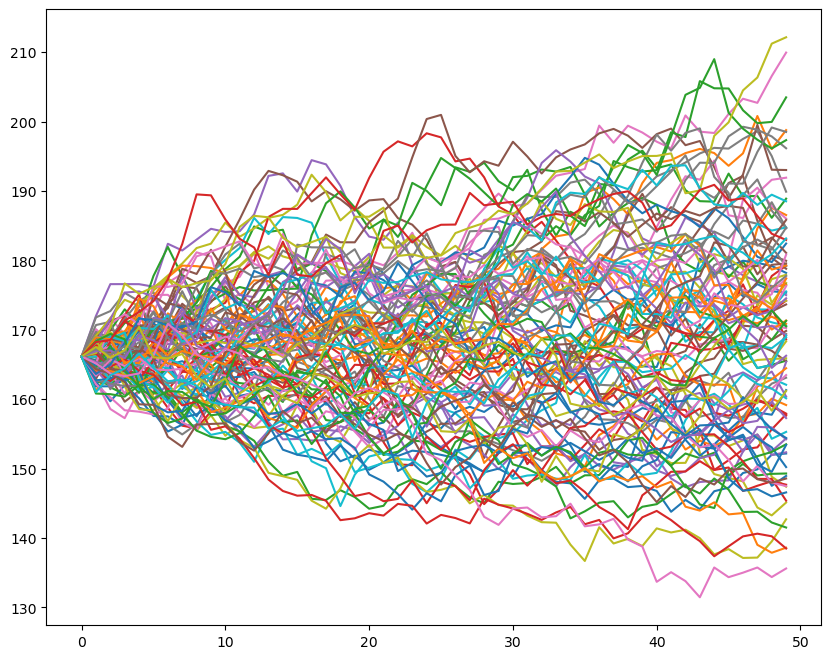

In [7]:
plt.figure(figsize=[10,8])
plt.plot(price_paths)

Maintenant, nous pouvons voir les prix simulés de l'action pour les 50 prochains jours, basés sur le même niveau de volatilité qu'elle a historiquement connu.

# Advantages and desadvantages de la Simulation de Monte Carlo


La méthode de Monte Carlo est un outil précieux pour les investisseurs afin d'estimer les chances de gain ou de perte sur un investissement.

Cependant, aucune simulation ne peut prédire avec précision un résultat exact. La méthode de Monte Carlo vise à fournir une estimation plus fiable de la probabilité qu'un résultat s'écarte d'une valeur projetée.

La différence clé par rapport à d'autres méthodes est que la méthode de Monte Carlo consiste à tester plusieurs variables aléatoires et à les moyenner, plutôt que de commencer avec une moyenne